# Lab 1, T3 2019 (27/09/2019)

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

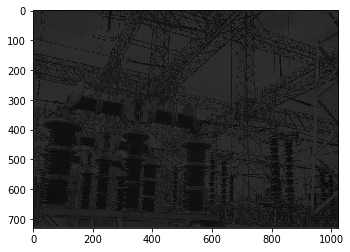

In [2]:
img = cv2.imread('ansel_adams.jpg', 1)

def preview(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

preview(img)

### Contrast Stretching

Transformation function is given by

$$ Tr = (Or - c) \big( \frac{b-a}{d-c} \big) + a $$

## Question 1

Read the given grey scale image and perfom contrast stretching to improve the quality of the image.

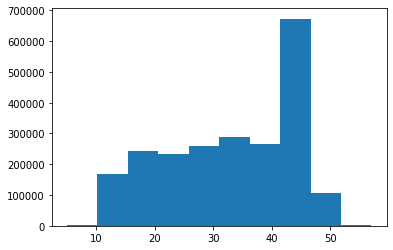

In [3]:
y, x, _ = plt.hist(img.ravel())

c = x.min()
d = x.max()
a = 0
b = 255

row, col, _ = img.shape

for rr in range(row):
    for cc in range(col):
        img[rr,cc] = (img[rr,cc] - c) * ((b-a) / (d-c)) + a

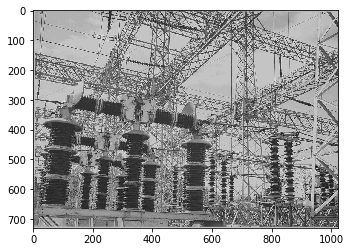

In [4]:
preview(img)

In [ ]:
# img = cv2.imread('ansel_adams.jpg', 1)

cv2.namedWindow('demo', cv2.WINDOW_AUTOSIZE)

kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float)

while True:
    
    dst = cv2.filter2D(img, -1, kernel)
    cv2.imwrite('laplacian.jpg', dst)
    cv2.imshow('demo', dst)
    
    c = cv2.waitKey(500)
    if c == 27:
        break

## Question 2

Write a function taht computes the hitogram of the given grey scale image and displays a plot.

In [ ]:
_, _, _ = plt.hist(img.ravel(),256,[0,256])

### Image Edges

A transition between different areas of brightness in an image $I$, means there must be a steep slope which we formalise as the gradient of

$$ \nabla I = (\frac{\delta I}{\delta x}, \frac{\delta I}{\delta y}) $$

image.

## Question 3

With the given image, use the Sobel operator to compute the image gradients at x and y directions. To do this, first define the2D filters ($F_x$ and $F_y$). Then perform convolution between the image and $F_x$ to obtain the gradients at x direction, and similarly perform convolution betwwen the image and $F_y$ to obtain the gradients at y direction.

In [ ]:
# Testing with Sobel operator in OpenCV

# grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3,\
#                    scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3,\
#                    scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# print(grad_x)
# print(grad_y)

gray = img
# gray = cv2.imread('ansel_adams.jpg', 1)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

F_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype='uint8')

F_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

row, col, _ = gray.shape

gx = cv2.filter2D(gray, -1, F_x)
gy = cv2.filter2D(gray, -1, F_y)

g = np.sqrt(gx * gx + gy * gy)

print(g)
        
plt.imshow(gray)

In [ ]:
img = cv2.GaussianBlur(img, (3, 3), 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)
abs_dst = cv2.convertScaleAbs(dst)

cv2.imwrite("laplacian_2.jpg", abs_dst)
cv2.namedWindow('demo', cv2.WINDOW_AUTOSIZE)
cv2.imshow('demo', abs_dst)
cv2.waitKey(0)


[[ 47  46  46 ...  45  45  45]
 [ 45 127 127 ... 127 127  45]
 [ 45 127 127 ... 127 127  45]
 ...
 [ 45 127 127 ... 127 127  43]
 [ 44 127 127 ... 127 127  44]
 [ 44  45  45 ...  45  45  45]]


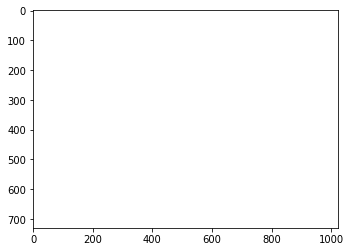

In [7]:
img = cv2.imread('ansel_adams.jpg', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

row, col = gray.shape

mask = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype='float')

def laplacian(img, centre):
    r, c = centre
    pixel = np.zeros([3,3])
    L = np.zeros([3,3])
    for i in range(3):
        for j in range(3):
            pixel[i,j] = img[r+i-1, c+j-1] * mask[i,j]
#             print('[',r+i-1,']','[',c+j-1,']', '[',i, j,']')

    for x in range(3):
        for y in range(3):
            L[i,j] = pixel[x+1,y] + pixel[x-1,y] + pixel[x,y+1] + pixel[x,y-1] - 4*pixel[x,y]
    return 

for r in range(1, row-1):
    for c in range(1, col-1):
        gray[r,c] = laplacian(gray, (r, c))

print(gray)
        
plt.imshow(abs(gray), cm.gray)

In [3]:
print(cv2.CV_16S)

3
